In [100]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error as MSE

import sys
sys.path.append("../")

from src.helpers import MSE, RMSE, calculate_RMSE_balanced, Timer, autoscaling, \
                        calculate_composite_RMSE_V_CaT, update_array_from_kwargs, get_value_by_key

In [106]:
def calculate_RMSE_balanced(x, y):
    assert(len(x) == len(y))
    x = (x - y.min(axis=0)) / y.ptp(axis=0)
    y = (y - y.min(axis=0)) / y.ptp(axis=0)
    return RMSE(x, y)

In [107]:
def calculate_RMSE_balanced(x, y):
    assert(len(x) == len(y))
    x = (x - y.min(axis=0)) / y.ptp(axis=0)
    y = (y - y.min(axis=0)) / y.ptp(axis=0)
    return np.sqrt(np.mean(((x - y)**2)))

In [108]:
x = pd.Series(np.arange(10), name='x')
y = x.copy()
y.name = 'y'
y.iloc[0] = 1

In [109]:
x

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
Name: x, dtype: int64

In [110]:
y

0    1
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
Name: y, dtype: int64

In [111]:
MSE(x, y, squared=False)

0.31622776601683794

In [112]:
((x - y)**2).sum() / len(x)

0.1

In [113]:
df = pd.concat([x, y], axis=1)

In [114]:
df

,x,y
0,0,1
1,1,1
2,2,2
3,3,3
4,4,4
5,5,5
6,6,6
7,7,7
8,8,8
9,9,9


In [115]:
def calculate_RMSE(x, y):
    assert(len(x) == len(y))
    return np.sqrt(np.mean(((x - y)**2)))

In [116]:
calculate_RMSE(x, y)

0.31622776601683794

In [121]:
df.shape

(10, 2)

In [130]:
MSE(df, df + 2)

4.0

In [118]:
calculate_RMSE_balanced(df.values + 1, df.values)

0.11825962754115556

In [120]:
error

0.11805555555555555

In [99]:
a

array([[0.11111111, 0.125     ],
       [0.22222222, 0.125     ],
       [0.33333333, 0.25      ],
       [0.44444444, 0.375     ],
       [0.55555556, 0.5       ],
       [0.66666667, 0.625     ],
       [0.77777778, 0.75      ],
       [0.88888889, 0.875     ],
       [1.        , 1.        ],
       [1.11111111, 1.125     ]])

In [88]:
b

array([[0.        , 0.        ],
       [0.11111111, 0.        ],
       [0.22222222, 0.125     ],
       [0.33333333, 0.25      ],
       [0.44444444, 0.375     ],
       [0.55555556, 0.5       ],
       [0.66666667, 0.625     ],
       [0.77777778, 0.75      ],
       [0.88888889, 0.875     ],
       [1.        , 1.        ]])

In [459]:
def calculate_RMSE_balanced(x, y):
    assert(len(x) == len(y))
    x = (x - y.min(axis=0)) / y.ptp(axis=0)
    y = (y - y.min(axis=0)) / y.ptp(axis=0)
    return np.sqrt(np.mean(((x - y)**2), axis=0)), x, y


def update_fitness(phenotype_model_last, config):
    loss = 0
    for exp_cond_name, exp_cond in config['experimental_conditions'].items():
        
        if exp_cond_name == 'common':
            continue

        phenotype_control = exp_cond['phenotype'].values
        phenotype_model = phenotype_model_last[exp_cond_name]
        V = phenotype_model['V'].values[:len(phenotype_control)]

        volumes = legend['constants'][['Vss'] + [f'Vnonjunct{i}' for i in range(1, 4 + 1)]]
        concentrations = phenotype_model[['Cass'] + [f'Cai{i}' for i in range(1, 4 + 1)]]
        Cai_mean = (concentrations.values * volumes.values).sum(axis=1) / sum(volumes)
        Cai_mean = Cai_mean[:len(phenotype_control)]

        phenotype_model = np.vstack([V, Cai_mean]).T
        
        phenotype_model   = (phenotype_model   - phenotype_control.min(axis=0)) / phenotype_control.ptp(axis=0)
        phenotype_control = (phenotype_control - phenotype_control.min(axis=0)) / phenotype_control.ptp(axis=0)

        weights = 1 / calculate_mean_abs_noise(phenotype_control)
        weights /= sum(weights)
        rmse = calculate_RMSE_weightened(phenotype_control, phenotype_model, weights)
        print(rmse)

        loss += sum(rmse)

#         if config['loss'] == 'RMSE':
#             loss += sklearn.metrics.mean_squared_error(phenotype_control, phenotype_model, squared=False)
#         elif config['loss'] == 'MSE':
#             loss += sklearn.metrics.mean_squared_error(phenotype_control, phenotype_model, squared=True)
#         elif config['loss'] == 'RMSE_balanced':
#             loss += calculate_RMSE_balanced(phenotype_control, phenotype_model)
#             # print(loss)
#         else:
#             print(f'Unknown loss {config["loss"]}',
#                   file=sys.stderr, fflush=True)
#             exit()
#             # loss += calculate_RMSE(phenotype_control, phenotype_model)
#             # loss += calculate_composite_RMSE_V_CaT(phenotype_control, phenotype_model)

        #break

    return loss, phenotype_model, phenotype_control

In [460]:
loss, x, y = update_fitness(phenotype_model_last, config)

[0.03308324 0.01824924]
[0.04683022 0.01782594]
[0.02709411 0.01114749]
[0.03004496 0.01301742]
[0.03377924 0.01754621]


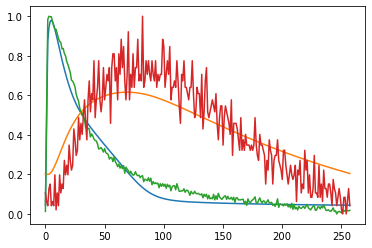

In [461]:
plt.plot(x)
plt.plot(y)

In [266]:
signal = x[:, 0]

In [300]:
weights = 1 / calculate_mean_abs_noise(x)
calculate_RMSE_weightened(x, y, weights)

array([8.7293255 , 1.82718343])

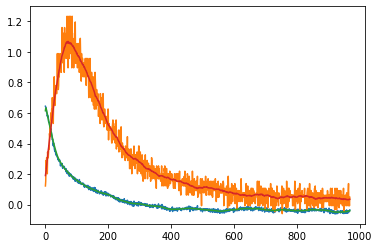

In [279]:
plt.plot(x_valid)
plt.plot(x_ma)

In [253]:
plt.plot(signal_valid)
plt.plot(signal_ma)

In [249]:
noise = signal_ma - signal_valid

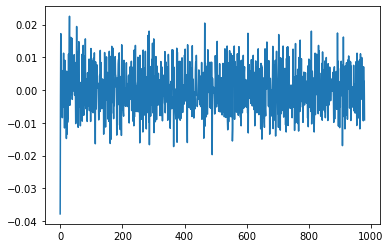

In [250]:
plt.plot(noise)

<AxesSubplot:ylabel='Count'>

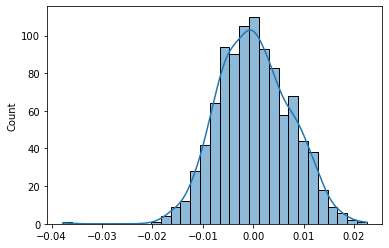

In [251]:
sns.histplot(noise, kde=True)

In [156]:
exp = exp_cond[1]['phenotype'].V

NameError: name 'a' is not defined

In [135]:
noise = exp[-500:].copy()
noise -= noise.mean()

In [136]:
noise

500    0.796509
501    1.406860
502    1.101685
503    1.406860
504    1.101685
         ...   
995    2.017212
996   -0.424194
997   -0.424194
998    0.491333
999   -0.729370
Name: V, Length: 500, dtype: float64

In [137]:
model = phenotype_model_last['2064'].V
model = model[:len(exp)]

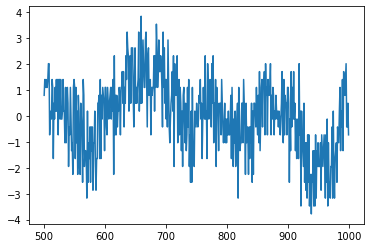

In [138]:
plt.plot(noise)

In [139]:
rmse1 = MSE(noise, noise*0, squared=False)
rmse2 = MSE(noise / np.ptp(model), noise*0, squared=False)

In [140]:
rmse1, rmse2

(1.4360101432398888, 0.00936863536703997)

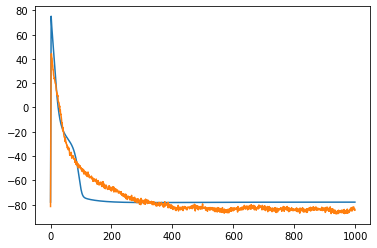

In [115]:
plt.plot(model)
plt.plot(exp)

In [116]:
from src.helpers import calculate_RMSE

In [117]:
from sklearn.metrics import mean_squared_error as MSE

In [118]:
np.mean(noise.abs())

1.1613525390625

In [121]:
#noise = model - exp

for factor in 0.1, 1, 10:
    rmse = MSE(noise * factor, noise*0, squared=False)
    print(rmse)

0.1436010143239889
1.4360101432398888
14.36010143239889
